In [1]:
import pennylane as qml
from pennylane import numpy as np
import random
import torch
from matplotlib import pyplot as plt

In [2]:
qubits = 8
layer = 3

In [3]:
dev = qml.device('default.qubit', wires=qubits)
@qml.qnode(dev, interface='torch', diff_method='backprop')
def gen_circuit(w):
    #qml.BasisState(np.ones(qubits), wires=range(qubits))
    V = np.diagflat(np.ones(2*qubits))
    r = np.zeros(2*qubits)
    qml.GaussianState(V, r, wires=range(qubits))
    z1 = random.uniform(-1, 1)
    z2 = random.uniform(-1, 1)
    # construct generator circuit for both atom vector and node matrix
    for i in range(qubits):
        qml.RY(np.arcsin(z1), wires=i)
        qml.RZ(np.arcsin(z2), wires=i)
    
    
    for l in range(layer):
        for i in range(qubits):
            qml.RY(w[i], wires=i)
        for i in range(qubits-1):
            qml.CNOT(wires=[i, i+1])
            qml.RZ(w[i+qubits], wires=i+1)
        qml.CNOT(wires=[i+1, 0])
    return [qml.expval(qml.PauliZ(i)) for i in range(qubits)]

In [4]:
gen_weights = np.random.rand(layer*(qubits*2-1))*2*np.pi-np.pi

In [5]:
gen_weights

tensor([-2.01261445, -2.84597732, -2.15388993,  0.8006617 ,  0.50390762,
         1.43895982, -0.66877646, -0.42707543, -0.20184608, -2.96612442,
        -2.24299804,  0.80558441,  0.97675296,  2.38650421,  1.00351859,
        -0.3768138 , -0.3290896 ,  0.59069737,  0.65491068, -3.13695119,
         3.00018941, -2.31374588,  1.35919474, -2.66663832, -0.4284713 ,
        -0.99190744, -1.7507719 ,  2.10543357,  1.65437774,  0.29891898,
         0.85542258, -0.56750454, -2.33434698,  0.46117448, -1.84972752,
        -1.01645656,  0.86815722,  1.00168741,  2.0158914 ,  0.20969618,
         2.64930735,  0.7214021 ,  1.54404701,  2.57583608,  0.28965061], requires_grad=True)

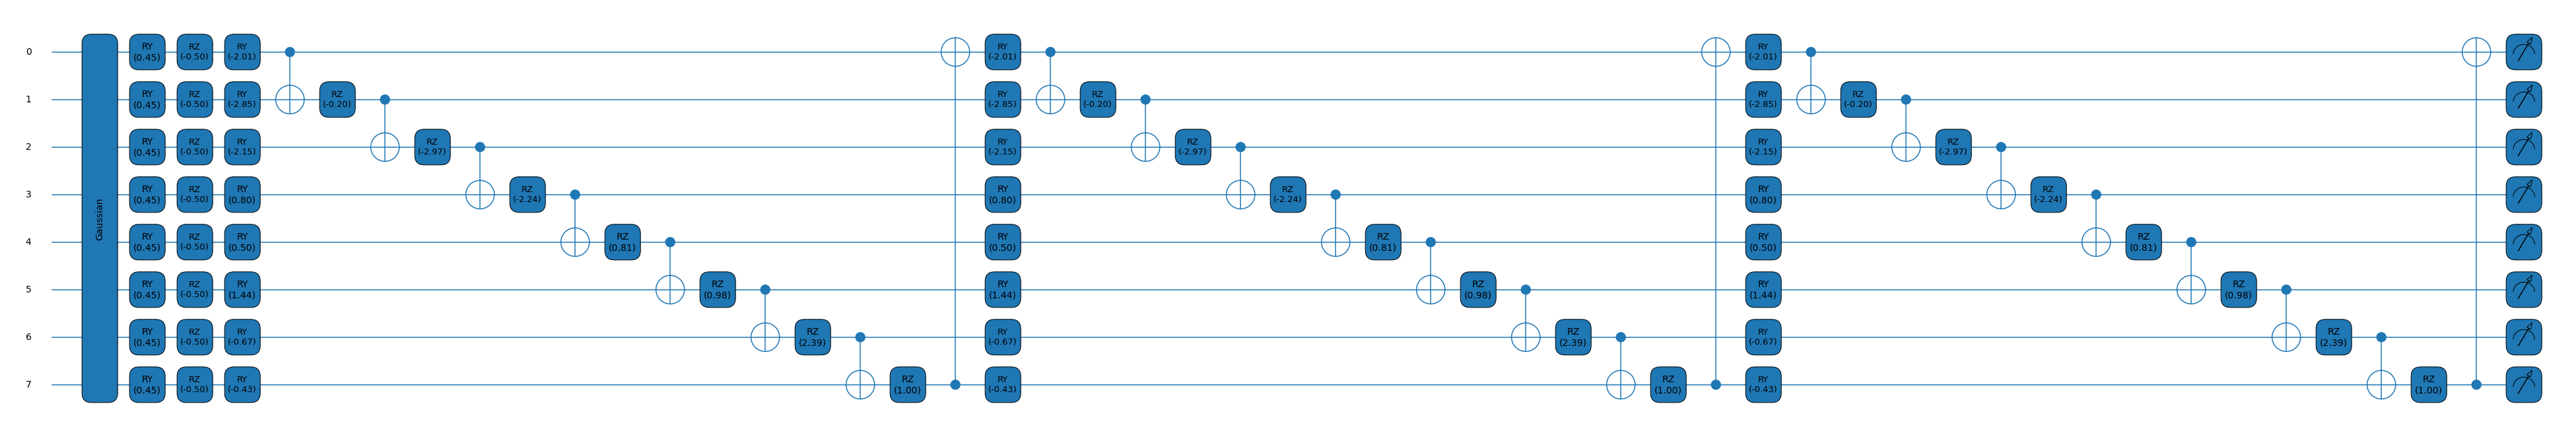

In [6]:
fig, ax = qml.draw_mpl(gen_circuit, decimals=2)(gen_weights)

In [7]:
sample_list = [gen_circuit(gen_weights) for i in range(5000)]

DeviceError: Gate GaussianState not supported on device default.qubit.torch

In [ ]:
z = torch.stack(tuple(sample_list)).float().detach().numpy()

In [ ]:
fig = plt.figure(figsize=(60, 30))
xaxes = ['x1','x2','x3','x4','x5','x6','x7','x8']
yaxes = ['y1','y2','y3','y4','y5','y6','y7','y8']
titles = '12345678'
f,a = plt.subplots(4, 2, figsize=(8,8))
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(z[:,idx], bins=100)
    ax.set_xlabel(xaxes[idx])
    ax.set_ylabel(yaxes[idx])
    ax.set_title(titles[idx])
plt.tight_layout()